# 1 . Propagación temporal sobre autoestados no ligados.

Considere un sistema que cuyo hamiltoniano tiene dos autoestados $\ket{1}$ y $\ket{2}$. A partir de ellos podemos definir los estados no estacionarios
        
$\ket{+} = \frac{1}{\sqrt{2}} \left( \ket{1} + \ket{2} \right),
        \quad
        \ket{-} = \frac{1}{\sqrt{2}} \left( \ket{1} - \ket{2} \right)$

Suponga que en $t=0$ el estado se encuentra en el estado $\ket{+}$. Calcule y grafique la probabilidad de encontrar el sistema en los estados $\ket{+}$ y $\ket{-}$ en $t>0$.

In [49]:

#Importamos las librerias y funciones que podamos usar sobre la marcha
from scipy import integrate
import math
import numpy as np
import matplotlib.pyplot as plt

### Definicion de las funciones a usar en este ejercicio

In [50]:
#Delta de Kroneker
def dcroc(i, j):
    if i == j:
        return 1
    else:
        return 0

# Definición de bases ortogonales en Rn
def baseRn(dim):
    base = []
    for i in range(1, dim + 1):
        base.append([dcroc(j, i) for j in range(1, dim + 1)])
    return np.array(base)


#Producto punto funcional y vectorial
def dot(dom,fun1,fun2):
    if dom != None:
        inte = integrate.simpson(fun1*fun2,dom)
        return inte
    else:
        # SI estamos aqui es porque fun1 y fun2 se tratan de vectores
        dot_prod = np.sum(fun1*fun2)
        return dot_prod

#Probabilidad de obtener un estado especifico |+>, aproximación del operador propagador mendainte series de Taylor
def prob1(order,H,phi0,t):
    global mas
    hamilt = np.zeros((2, 2))
    for i in range(order):
        hamilt = hamilt + (1 / math.factorial(i)) * (np.linalg.matrix_power(H, i)) * math.pow(t, i) * (-1j) ** i

    phit = hamilt @ phi0
    prob =  abs(dot(None, phit, mas))**2

    return prob


#Probabilidad de obtener un estado especifico |->, aproximación del operador propagador mendainte series de Taylor
def prob2(order,H,phi0,t): 
    global menos
    hamilt = np.zeros((2, 2))
    for i in range(order):
        hamilt = hamilt + (1 / math.factorial(i)) * (np.linalg.matrix_power(H, i)) * math.pow(t, i) * (-1j) ** i

    phit = hamilt @ phi0
    prob =  abs(dot(None, phit, menos))**2

    return prob

__Definimos una base bidimensional que haga las veces de los autoestados del Hamiltoniano. Base ortogonal.__

In [51]:
dim = 2
base = baseRn(dim)

u1 = np.array([base[0]]).T
u2 = np.array([base[1]]).T

print(f"|1> = \n{u1}\n\n||||||||||||||||||||||||||||||\n\n|2> = \n{u2}")

|1> = 
[[1]
 [0]]

||||||||||||||||||||||||||||||

|2> = 
[[0]
 [1]]


__Definimos los estados no estacionarios:__

In [52]:
mas   = 1/math.sqrt(2) * (u1+u2)
menos = 1/math.sqrt(2) * (u1-u2)

print(f"|+> = \n{mas}\n\n||||||||||||||||||||||||||||||\n\n|-> = \n{menos}")

|+> = 
[[0.70710678]
 [0.70710678]]

||||||||||||||||||||||||||||||

|-> = 
[[ 0.70710678]
 [-0.70710678]]


Como tenemos estados de hamiltoniano, entonces tenemos estados de energia, usaremos estados predefinidos, y no estados genericos, ya que como queremos hacer la comparacion entre el desarrollo en base con respecto al desarrollo exacto del operador propagación temporal, entonces la divergencia del desarrollo aproximado diverge dependiendo fuertemente del intervalo temporal, por ende del valor de las energias que se tengan en cuenta. 

In [53]:
E1,E2 = -1,1

__Definimos la función de onda en $t= 0$ como el estado superpuesto $|+>$ y el hamiltoniano__

In [54]:
phi0 = mas
H = E1*u1@u1.T + E2*u2@u2.T

print(f"|phi(0)> = \n{phi0}\n\n||||||||||||||||||||||||||||||\n\n H = \n{H}")

|phi(0)> = 
[[0.70710678]
 [0.70710678]]

||||||||||||||||||||||||||||||

 H = 
[[-1  0]
 [ 0  1]]


Ahora para definir la funcion de onda en t>0 , esto se define con el operador funcional exp(iHt/hbar), pero este
programarlo de forma exacta resultaria muy dificil, por lo que usamos algunos de los terminos de la serie exponencial.
Definimos la función propagador del hamiltoniano usando la serie exponencial truncada

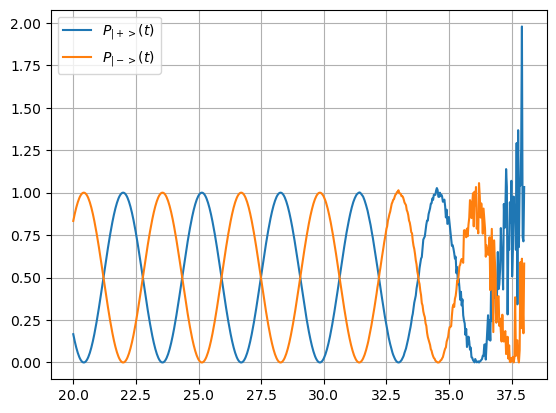

In [55]:
n =150
t = np.linspace(20,38,600)
prob1_arr = []

for i in range(len(t)):
    prob1_arr.append(prob1(n,H,phi0,t[i]))


plt.plot(t,prob1_arr, label = "$P_{|+>}(t)$")

prob2_arr = []

for i in range(len(t)):
    prob2_arr.append(prob2(n,H,phi0,t[i]))

plt.plot(t,prob2_arr, label = "$P_{|->}(t)$")
plt.grid()
plt.legend()

Ahora vamos a comparar el resultado con el exacto, teniendo en cuenta que el operador propagador temporal usa todos los
infinitos terminos de la serie. Notese que en este caso exacto, no hay limites para el intervalo temporal, en cambio la aproximacion de taylor diverge muy rapido para valores grandes de tiempo.

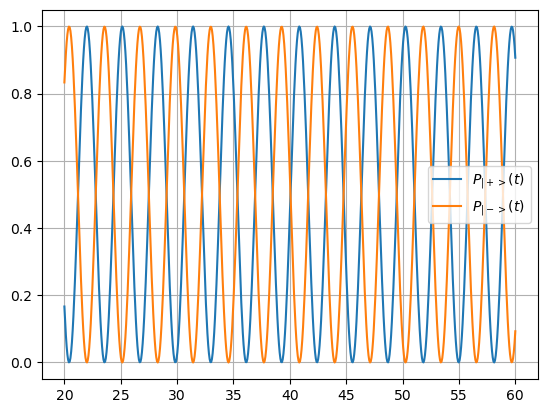

In [56]:
t = np.linspace(20,60,600)

phit = 1/math.sqrt(2) * (  u1@np.exp([-1j*E1*t]) + u2@np.exp([-1j*E2*t]))

C1sq = []

for i in range(len(t)):
    C1sq.append(abs(dot(None, phit[:,i:i+1], mas))**2)

plt.plot(t,C1sq, label = "$P_{|+>}(t)$")

C2sq = []

for i in range(len(t)):
    C2sq.append(abs(dot(None, phit[:,i:i+1], menos))**2)

plt.plot(t,C2sq, label = "$P_{|->}(t)$")
plt.grid()
plt.legend()